# Linear Regression

In [90]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Filter Data

In [91]:
data = pd.read_csv("insurance.csv")
data_male = data[data["sex"] == "male" ]
male_noSmoker = data_male [data_male["smoker"] == "no"]
male_noSmoker = male_noSmoker[male_noSmoker["region"] == "southeast"]
male_noSmoker = male_noSmoker[male_noSmoker["children"]==0]
male_noSmoker = male_noSmoker.sort_values(by="age",ascending=True)
male_noSmoker = male_noSmoker[["age","charges"]]
male_noSmoker = male_noSmoker.groupby("age", as_index=False)["charges"].mean()
male_noSmoker.head(5)

,age,charges
0,18,1140.130160
1,20,1391.528700
2,21,5292.154202
3,22,1669.815950
4,23,1825.814400


In [92]:
age = male_noSmoker["age"].values # x
charges = male_noSmoker["charges"].values # y

age_train,age_test,charges_train,charges_test = train_test_split(age,charges,train_size=0.8,test_size=0.2,random_state=23)

age_train,age_test,charges_train,charges_test = age_train.reshape(-1,1),age_test.reshape(-1,1),charges_train.reshape(-1,1),charges_test.reshape(-1,1)

# load data into model

In [93]:
model = LinearRegression()
model.fit(age_train,charges_train)

LinearRegression()

# Predict output based on Regression model

In [94]:
charges_predict = model.predict(age_test)
charges_predict

array([[ 9128.0584609 ],
       [12645.49535544],
       [ 5903.74130758],
       [10300.53742575],
       [11473.01639059],
       [ 1800.06493063],
       [12352.37561423]])

# Calculate the accuracy

In [95]:
train_accuracy = model.score(age_train,charges_train)
test_accuracy = model.score(age_test,charges_test)
print(train_accuracy,test_accuracy)

0.8730450678292534 -0.10493915108290208


# Plotting

Text(0.5, 1.0, 'Cost')

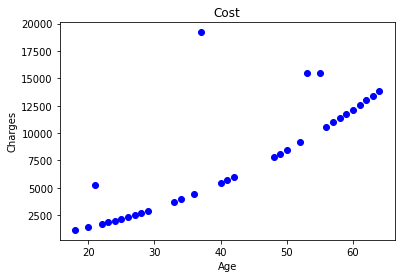

In [96]:
plt.scatter(age,charges,color="blue")
plt.xlabel('Age')
plt.ylabel("Charges")
plt.title("Cost")

Text(0.5, 1.0, 'Actual Data(blue) vs Predicted Data(red)')

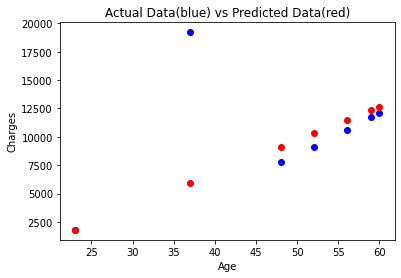

In [98]:
plt.scatter(age_test,charges_test,color='blue')
plt.scatter(age_test,charges_predict,color = 'red')
plt.xlabel('Age')
plt.ylabel("Charges")
plt.title("Actual Data(blue) vs Predicted Data(red)")